EC9630 Machine Learning - Laboratory 05

Task: UNSUPERVISED LEARNING

Name: Lakshan W.G.

Reg No: 2020/E/079

Date: 14 Aug 2024

Time: 08.00 a.m

https://www.kaggle.com/learn

https://scikit-learn.org/stable/unsupervised_learning.html

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset Handling

In [ ]:
import pandas as pd

# Corrected file path with quotation marks
df = pd.read_csv('/content/drive/MyDrive/online_shoppers_intention.csv')
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Data Preprocessing

In [ ]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


###Data encoding and scaling

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

scaler = StandardScaler()
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
df[numerical_features] = scaler.fit_transform(df[numerical_features])


## Exploratory Data Analysis

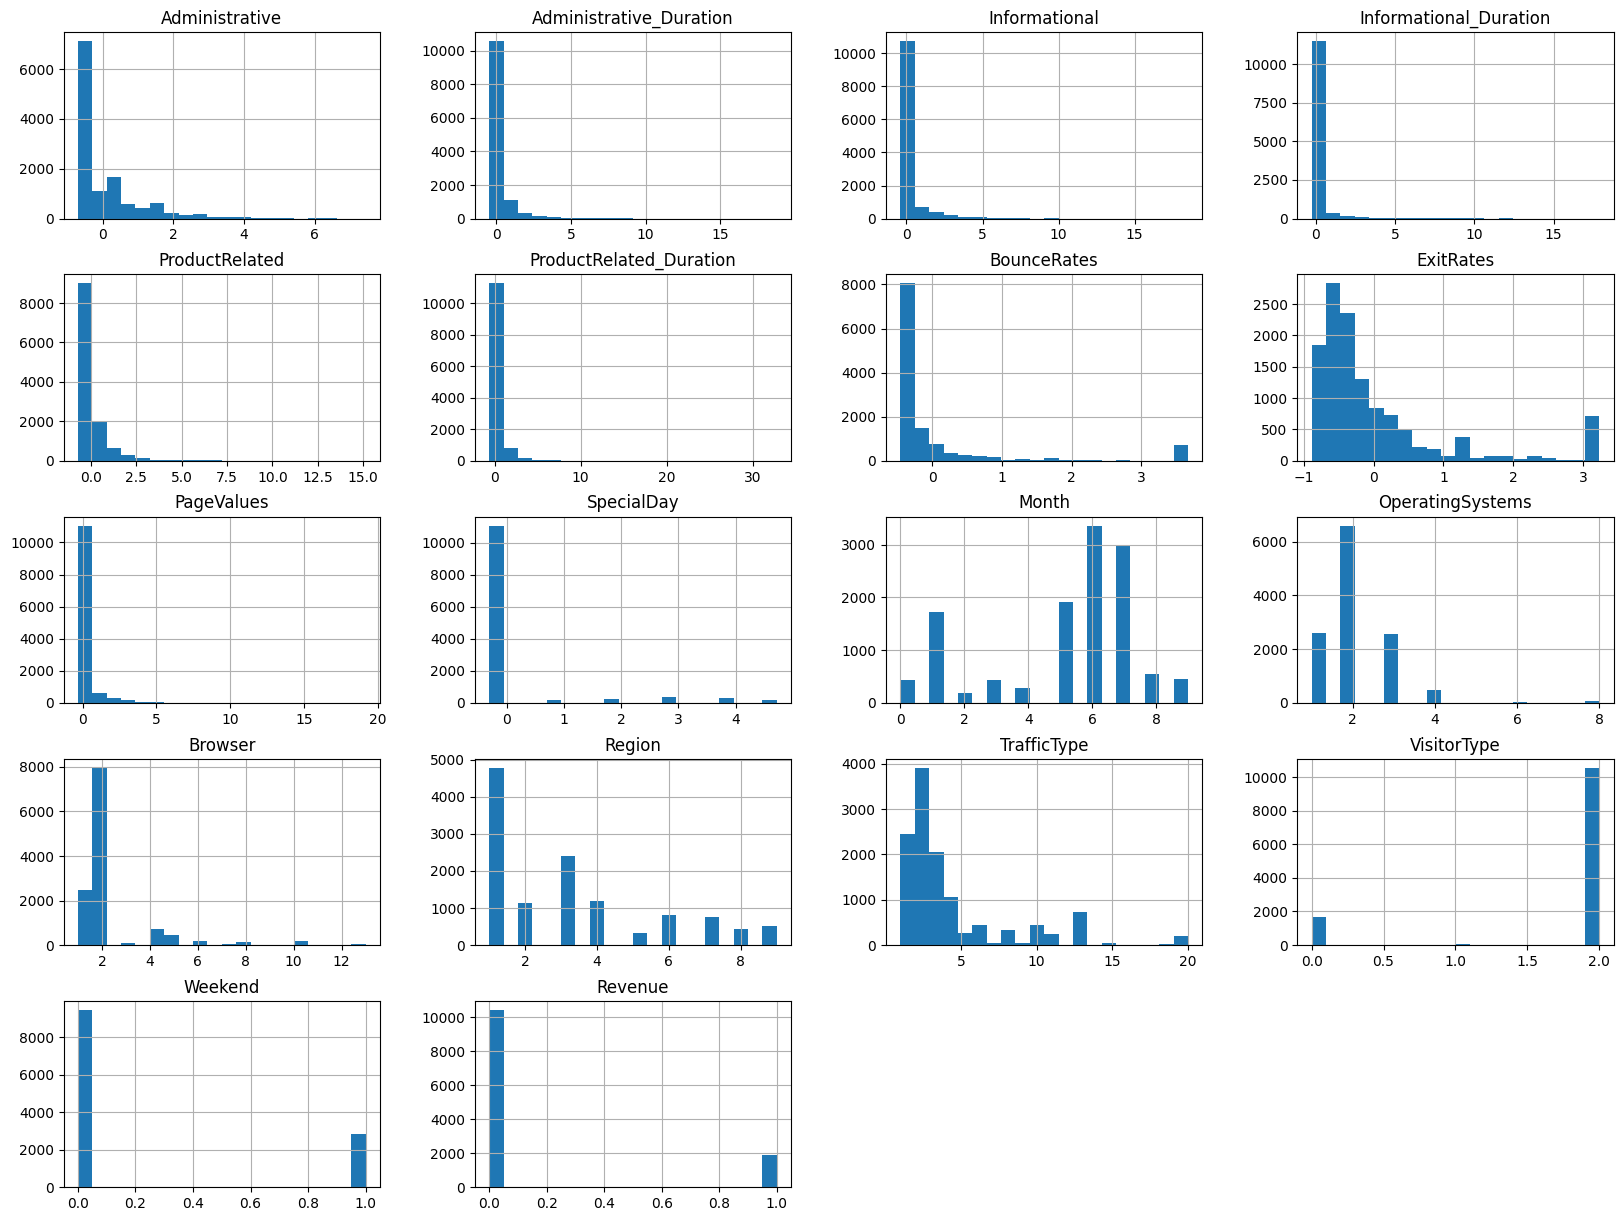

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=20, figsize=(20, 15))
plt.show()


## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## K-means Clustering

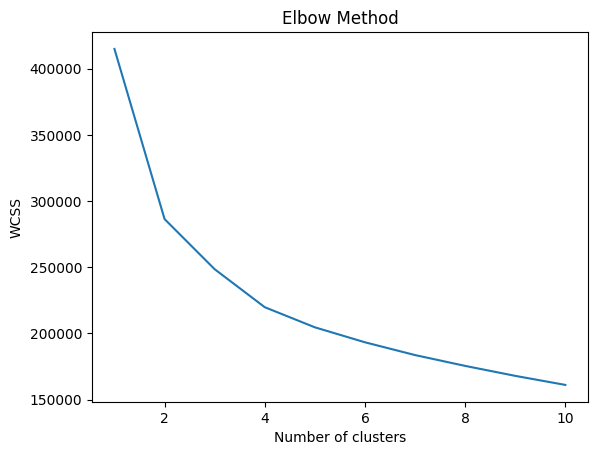

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


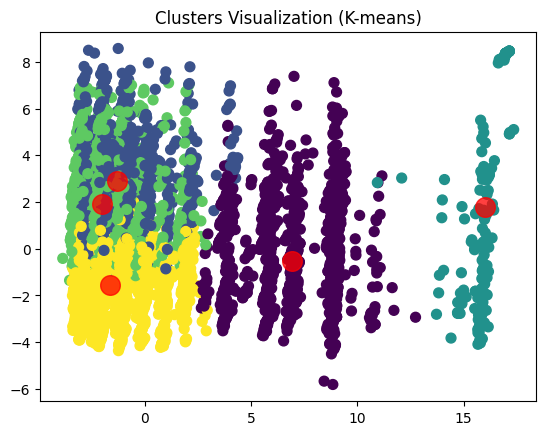

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
centers_pca = pca.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='Red', s=200, alpha=0.75)
plt.title('Clusters Visualization (K-means)')
plt.show()


## Gaussian Mixture Model (GMM)

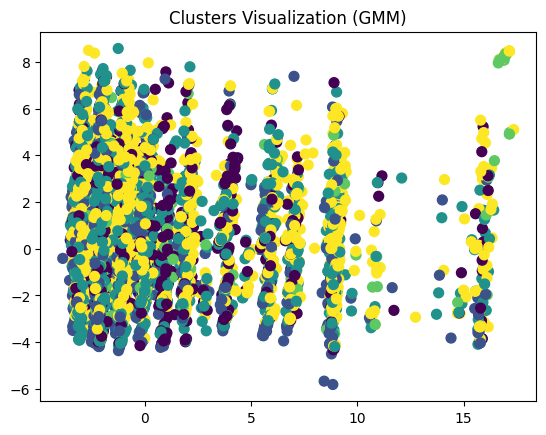

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(X_train)
y_gmm = gmm.predict(X_train)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.title('Clusters Visualization (GMM)')
plt.show()


## Compare K-means and GMM

In [ ]:
from sklearn.metrics import adjusted_rand_score, v_measure_score, homogeneity_score, completeness_score

def clustering_metrics(true_labels, pred_labels):
    ari = adjusted_rand_score(true_labels, pred_labels)
    v_measure = v_measure_score(true_labels, pred_labels)
    homogeneity = homogeneity_score(true_labels, pred_labels)
    completeness = completeness_score(true_labels, pred_labels)
    return ari, v_measure, homogeneity, completeness

kmeans_metrics = clustering_metrics(y_train, y_kmeans)
gmm_metrics = clustering_metrics(y_train, y_gmm)

print("K-means Metrics: ", kmeans_metrics)
print("GMM Metrics: ", gmm_metrics)


K-means Metrics:  (-0.0033176431715508485, 0.0007577734393892343, 0.0015463260704861887, 0.0005018525476527129)
GMM Metrics:  (0.06849049371861914, 0.06191089699880928, 0.13235516004260175, 0.04040557194863235)


## Additional Clustering Algorithms

###  Implement DBSCAN and Agglomerative Clustering

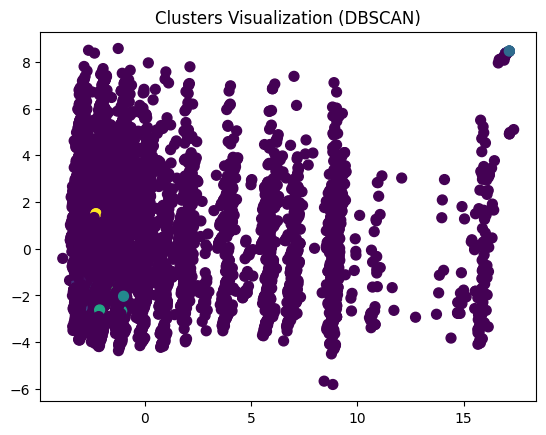

In [ ]:
from sklearn.cluster import DBSCAN

# Implement DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan = dbscan.fit_predict(X_train)

# Visualize DBSCAN results using PCA
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.title('Clusters Visualization (DBSCAN)')
plt.show()


### Agglomerative Clustering

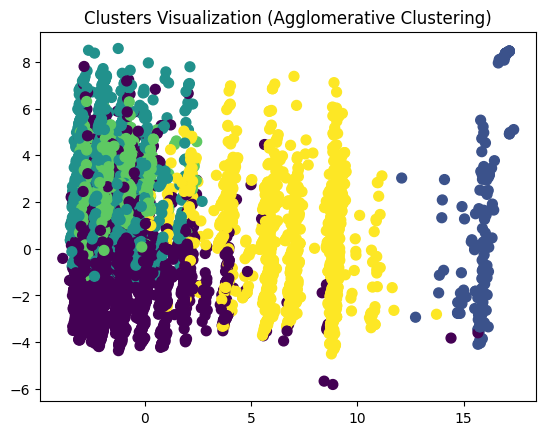

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Implement Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=5)
y_agg = agg.fit_predict(X_train)

# Visualize Agglomerative Clustering results using PCA
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_agg, s=50, cmap='viridis')
plt.title('Clusters Visualization (Agglomerative Clustering)')
plt.show()


## Evaluate and Compare All Clustering Methods

https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# Define a function for evaluating clustering performance
def clustering_metrics(true_labels, pred_labels):
    ari = adjusted_rand_score(true_labels, pred_labels)
    v_measure = v_measure_score(true_labels, pred_labels)
    homogeneity = homogeneity_score(true_labels, pred_labels)
    completeness = completeness_score(true_labels, pred_labels)
    return ari, v_measure, homogeneity, completeness

# Evaluate and print metrics for each clustering algorithm
kmeans_metrics = clustering_metrics(y_train, y_kmeans)
gmm_metrics = clustering_metrics(y_train, y_gmm)
dbscan_metrics = clustering_metrics(y_train, y_dbscan)
agg_metrics = clustering_metrics(y_train, y_agg)

print("K-means Metrics: ", kmeans_metrics)
print("GMM Metrics: ", gmm_metrics)
print("DBSCAN Metrics: ", dbscan_metrics)
print("Agglomerative Clustering Metrics: ", agg_metrics)


K-means Metrics:  (-0.0033176431715508485, 0.0007577734393892343, 0.0015463260704861887, 0.0005018525476527129)
GMM Metrics:  (0.06849049371861914, 0.06191089699880928, 0.13235516004260175, 0.04040557194863235)
DBSCAN Metrics:  (-0.031327527540187576, 0.011237369396802754, 0.008237827689809107, 0.017672099820682206)
Agglomerative Clustering Metrics:  (-0.007731938208085359, 0.0013417435021429091, 0.0026225742779362893, 0.0009014749809133808)
